# Development of functions to calculate solutions to Teukolsky's homegeneous radial equation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


(__validate_inputs__)>> Not using NR convention for organizing solution space and setting the sign of the QNM freuency imaginary part.
(__leaver_helper__)>> NOT using NR convention for organizing solution space and setting the sign of the QNM freuency imaginary part.
(__leaver_helper__)>> Loading: /Users/book/JOKI/Libs/KOALA/positive_dev/positive/data/kerr/l2/n0l2m2.dat
(__leaver_helper__)>> Check Passed:Frequency and separation const. satisfy Leaver's equations with (l,m)=(2,2). Zero is approx 2.63e-09.
(test_slm)>> Check Passed: This object's spheroidal harmonic solves Teukolsky's angular equation with zero approximated by 1.60e-10.
0.5 0.35 [ 0.85714284 71.55721286]


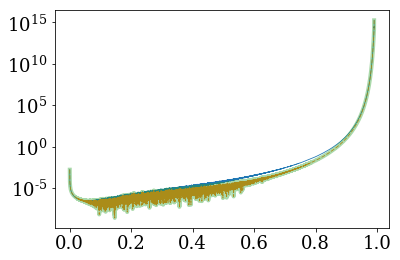

(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 6.12e-05.
(test_rlm!)>> There may be a bug: the calculated radial harmonic does not appear to solve Teukolsky's radial equation. The user should decide whether zero is poorly approximated by 6.12e-05.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x125f59a50>,
      dtype=object)

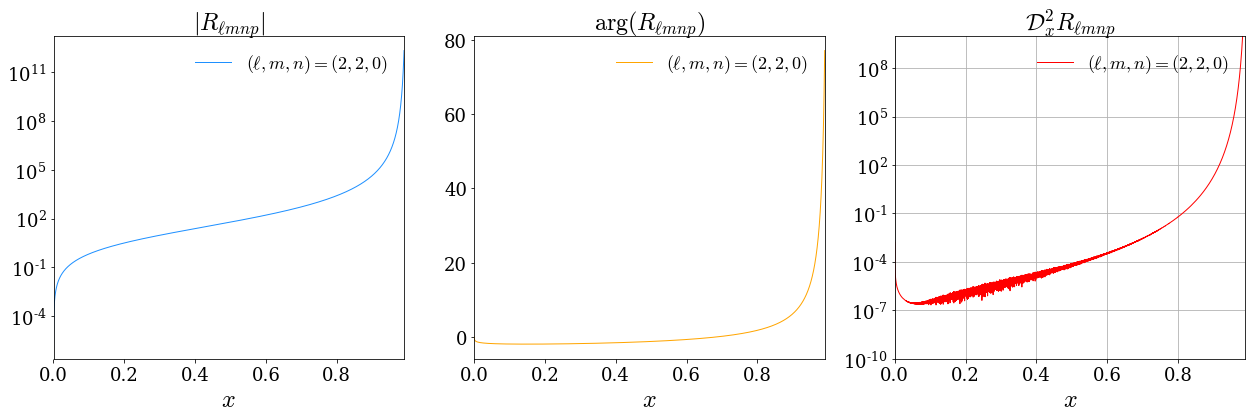

In [10]:
l,m = 2,2
a=0.7
M = 1
# --
n = 0

foo = qnmobj(M,a,l,m,n,verbose=True,use_nr_convention=False,calc_rlm=True,__DEVELOPMENT__=True)

foo.plot_rlm()

0.5 0.35 [ 0.85714284 71.55721286]


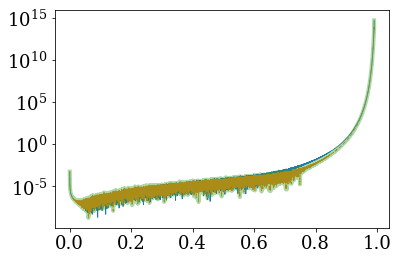

(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 3.17e-05.
(test_rlm!)>> There may be a bug: the calculated radial harmonic does not appear to solve Teukolsky's radial equation. The user should decide whether zero is poorly approximated by 3.17e-05.


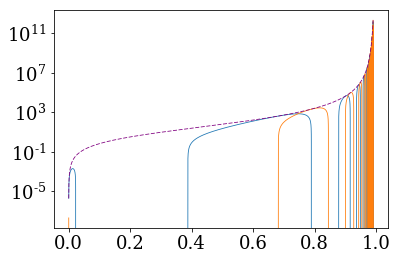

In [14]:
x,R = foo.__calc_rlm__(__DEVELOPMENT__=True)
plot(x,real(R))
plot(x,imag(R))
plot(x, abs(R), color='purple',ls='--')
# plot(x,-abs(R), color='purple',ls='--')
yscale('log')

## Investigate the effect of increasing the number of domain points

In [17]:
# define a list of domain sizes to use
numx_range = [ 2**k for k in range(8,18,2) ]
print numx_range

[256, 1024, 4096, 16384, 65536]


In [19]:
# for each domain size, generate the radial funciton and store for testing 
R_array = []
x_array = []
z_array = []
for numx in numx_range:
    x_,R_,z_ = foo.__calc_rlm__(num_x=numx,__DEVELOPMENT__=True)
    x_array.append(x_)
    R_array.append(R_)
    z_array.append(z_)

0.5 0.35 [ 0.85714284 71.55721286]
(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 2.49e-01.
(test_rlm!)>> There may be a bug: the calculated radial harmonic does not appear to solve Teukolsky's radial equation. The user should decide whether zero is poorly approximated by 2.49e-01.
0.5 0.35 [ 0.85714284 71.55721286]
(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 1.57e-02.
(test_rlm!)>> There may be a bug: the calculated radial harmonic does not appear to solve Teukolsky's radial equation. The user should decide whether zero is poorly approximated by 1.57e-02.
0.5 0.35 [ 0.85714284 71.55721286]
(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 9.76e-04.
(test_rlm!)>> There may be a bug: the calculated radial harm

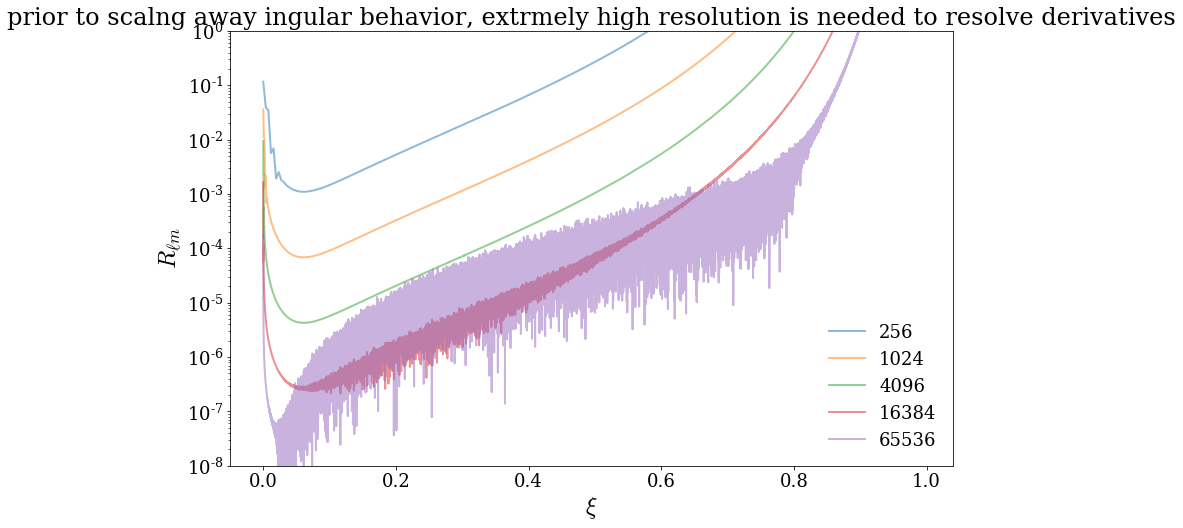

In [33]:

figure( figsize=2*figaspect(0.618) )

for k in range(len(numx_range)):
    plot( x_array[k], abs(z_array[k]),alpha=0.5, label=numx_range[k],lw=2 )
    
yscale('log')
ylim(1e-8,1e0)
legend()
ylabel(r'$R_{\ell m}$')
xlabel(r'$\xi$')
title('prior to scalng away ingular behavior, extrmely high resolution is needed to resolve derivatives');